# Numerisk prosjekt - FY1003

Ola Rønnestad Abrahamsen

## Oppgave a

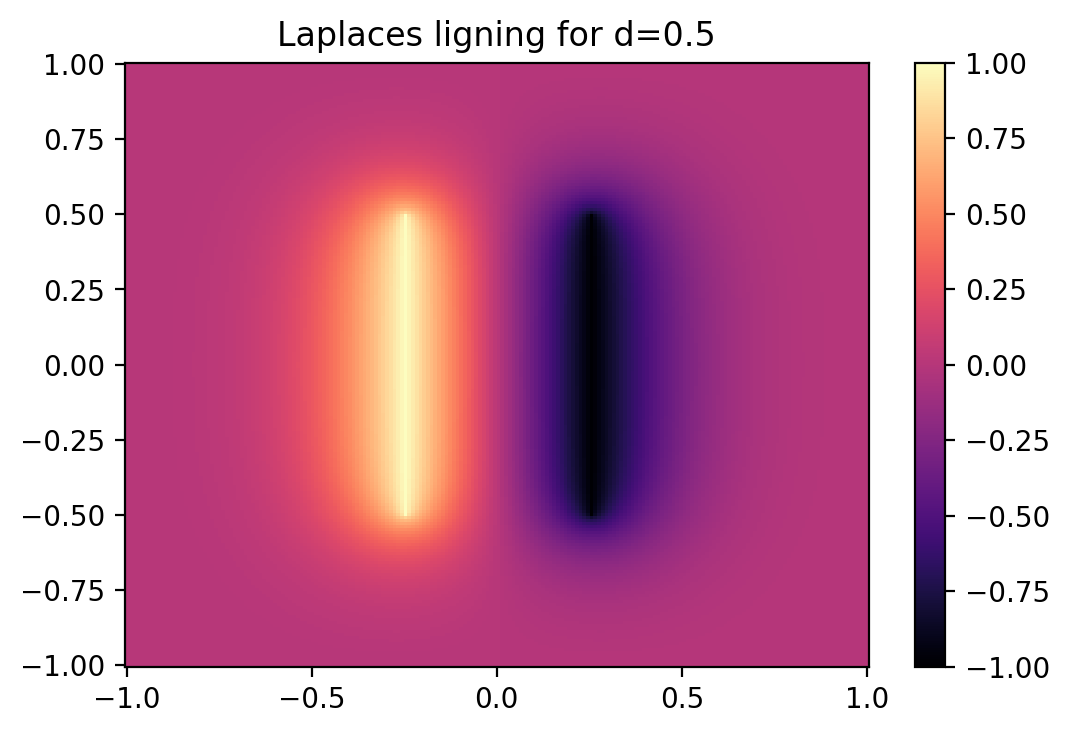

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 200 

N = 200

x = y = np.linspace(-1,1,N)

xx, yy = np.meshgrid(x,-y)

Z = np.zeros_like(xx)
ds = 2/N

placement_x = int(0.75/ds)

xl = placement_x
xr = -placement_x


placement_y = N-int(0.5/ds)

l = placement_y



def Jacobi_step(V_k):
    V_k = 1/4 * (np.roll(V_k,1,axis=0)+np.roll(V_k,-1,axis=0)+np.roll(V_k,1,axis=1)+np.roll(V_k,-1,axis=1))
    return V_k

def Jacobi(V_0,tol):    
    i = 0
    V_k = Jacobi_step(V_0)

    while i<1120:
        V_k = Jacobi_step(V_k)
        i += 1
        V_k[-l:l, xl] = 1
        V_k[-l:l, xr] = -1
        
        for j in range(N):
            V_k[-N:-N+1,j]=0
            V_k[N-1:N,-j]=0
            V_k[j,-N:-N+1]=0
            V_k[-j,-N:-N+1]=0
        

        
        
    return V_k



vals  = Jacobi(Z,3)


plt.pcolormesh(xx,yy,vals,cmap='magma', shading='auto')
plt.colorbar()

plt.title("Laplaces ligning for d=0.5")



plt.show()

## Oppgave b

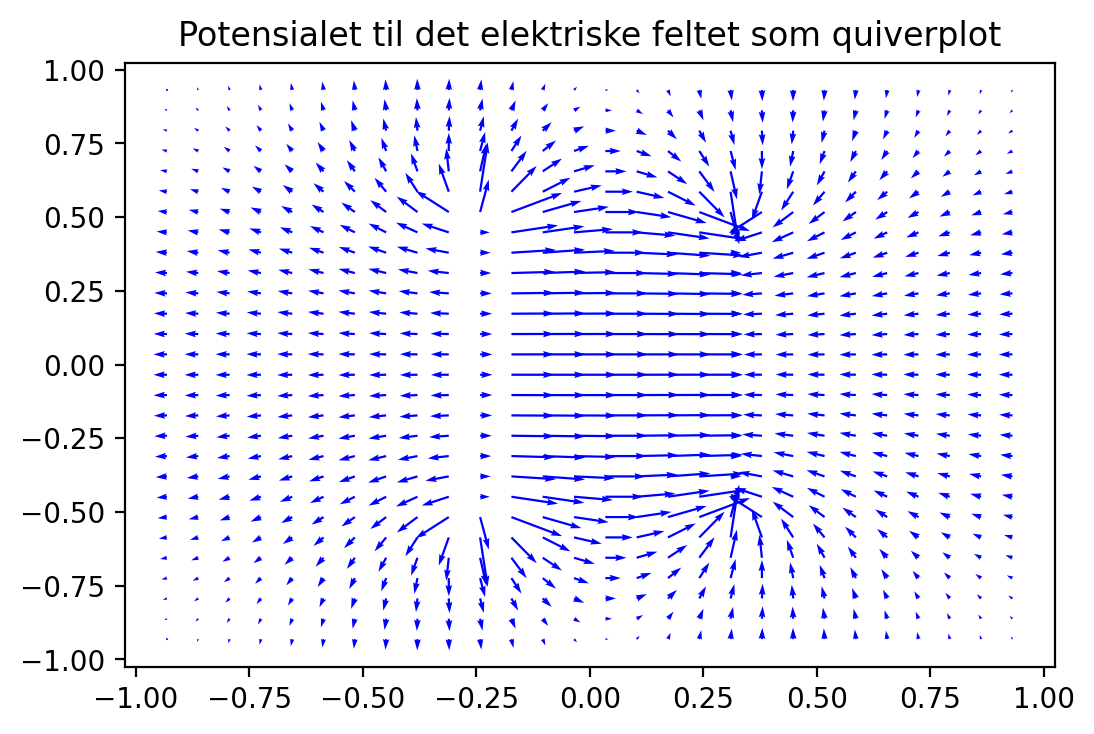

In [ ]:

N = 30
x = y = np.linspace(-1,1,N)

xx, yy = np.meshgrid(x,-y)

Z = np.zeros_like(xx)
ds = 2/N

placement_x = int(0.75/ds)

xl = placement_x
xr = -placement_x


placement_y = N-int(0.5/ds)

l = placement_y

def gradient_V(V):


    E_x = V[1:-1,2:N] - V[1:-1,0:-2]
    E_y = V[2:N,1:-1] - V[0:-2,1:-1]
    dx = x[2]-x[1]
    
    E_x = -E_x / dx
    E_y = -E_y / dx
    
    x_q = x[1:-1]
    y_q = y[1:-1]
    
    return E_x, E_y, x_q, y_q

E_x, E_y, x_q, y_q = gradient_V(Jacobi(Z,3))

#colormap = cm.inferno

plt.title("Potensialet til det elektriske feltet som quiverplot")

plt.quiver(x_q, y_q, E_x, E_y, color='b')
plt.show()

## Oppgave c

61


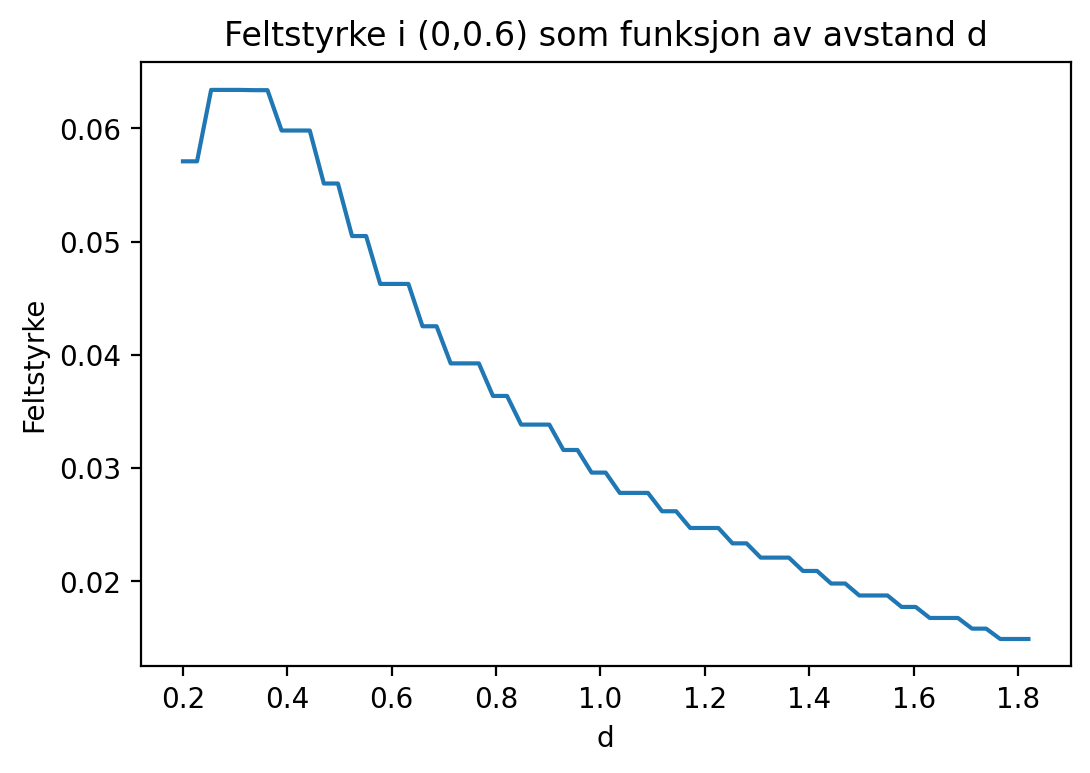

In [ ]:
N=61
dist = np.linspace(0.1,0.91,N)

print(len(dist))



func_vals = np.zeros(N)
i = 0


x = y = np.linspace(-1,1,N)

xx, yy = np.meshgrid(x,-y, indexing="xy")
    
for d in dist:


    Z = np.zeros_like(xx)
    ds = 2/N

    placement_x = int(d/ds)

    xl = placement_x
    xr = -placement_x


    placement_y = N-int(d/ds)

    l = placement_y

    vals  = Jacobi(Z,3)


    func_vals[i] = vals[int(N*0.6)][int(N/2)]

    i+=1
        

func_vals = np.flip(func_vals)

plt.plot(2*dist,func_vals)

plt.title("Feltstyrke i (0,0.6) som funksjon av avstand d")

plt.xlabel("d")

plt.ylabel("Feltstyrke")
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bdfe4c6e-e1d8-4690-a927-6c19630bd6c6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>